In [3]:
import pandas as pd
df=pd.read_csv('cardio_train_cleaned.csv')
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.0,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df = df.drop(columns=['Unnamed: 0', 'id'])
X = df.drop(columns=['cardio'])
y = df['cardio']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

print("\ Training Random Forest with GridSearch...")

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

param_grid_rf = {
    'n_estimators': [200, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_

print("\n✅ Best RF Parameters:")
print(grid_rf.best_params_)
print(f"✅ Best CV ROC-AUC: {grid_rf.best_score_:.4f}")
y_pred = best_rf.predict(X_test_scaled)
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]

print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))



<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2188\4186999526.py:4: SyntaxWarning: invalid escape sequence '\ '
  print("\ Training Random Forest with GridSearch...")


\ Training Random Forest with GridSearch...
Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [ ]:
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]

threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

print(f"Using threshold = {threshold}")
print(classification_report(y_test, y_pred))


Using threshold = 0.4
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      6914
           1       0.69      0.78      0.73      6776

    accuracy                           0.72     13690
   macro avg       0.72      0.72      0.72     13690
weighted avg       0.72      0.72      0.72     13690



In [ ]:
test_auc = roc_auc_score(y_test, y_prob)
print("Test ROC-AUC:", test_auc)


In [ ]:
import joblib

joblib.dump(best_rf, "rf_model.pkl")

joblib.dump(scaler, "scaler.pkl")

print("RandomForest model and scaler saved successfully!")


✅ RandomForest model and scaler saved successfully!


In [31]:
import joblib
import pandas as pd

model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

print(type(model))
print(type(scaler))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.preprocessing._data.StandardScaler'>


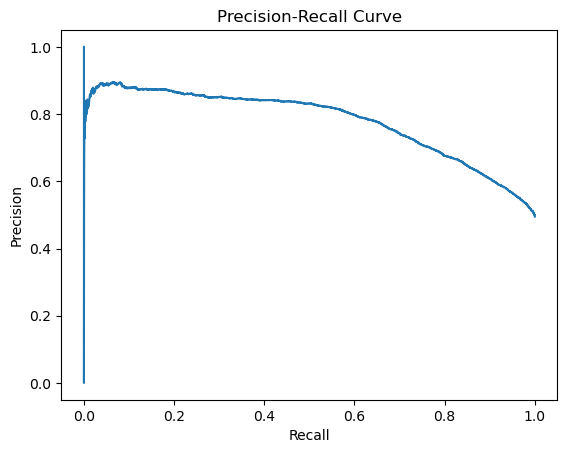

In [32]:
import joblib
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt



prec, rec, th = precision_recall_curve(y_test, y_prob)

plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
#It tells us how accurate positive predictions are and how many real positives we are able to catch.
#Precision → How many YES predictions are correct
#Recall → How many actual YES cases are found

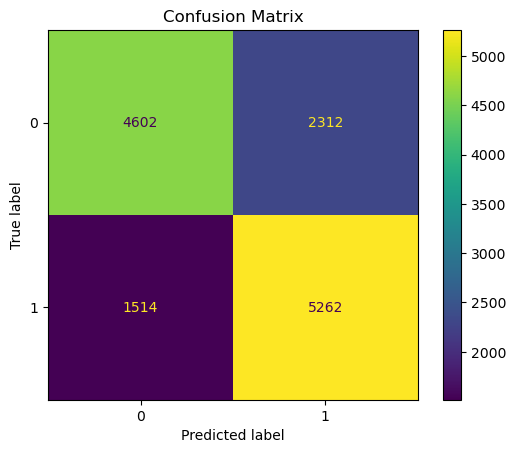

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = (y_prob >= 0.4).astype(int)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
#It is a table that compares predicted results with actual results.

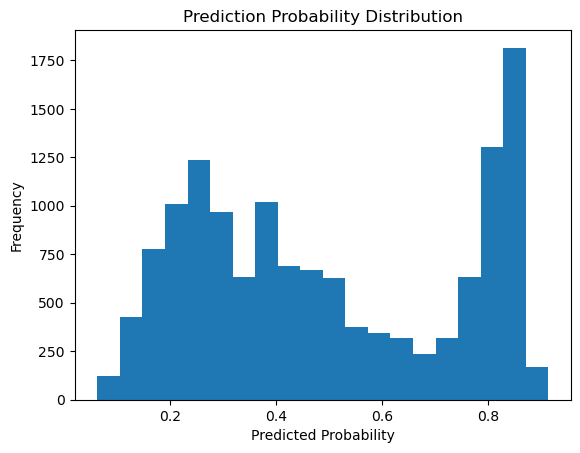

In [38]:
plt.hist(y_prob, bins=20)
plt.xlabel("Predicted Probability") #Predicted Probability) How confident the model is
plt.ylabel("Frequency") #How many predictions fall in that range
plt.title("Prediction Probability Distribution")
plt.show()


d:\sem4\anaconda_in\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\sem4\anaconda_in\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\sem4\anaconda_in\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\sem4\anaconda_in\Lib\site-packages\sklearn\metrics\_classification.py:1531: 

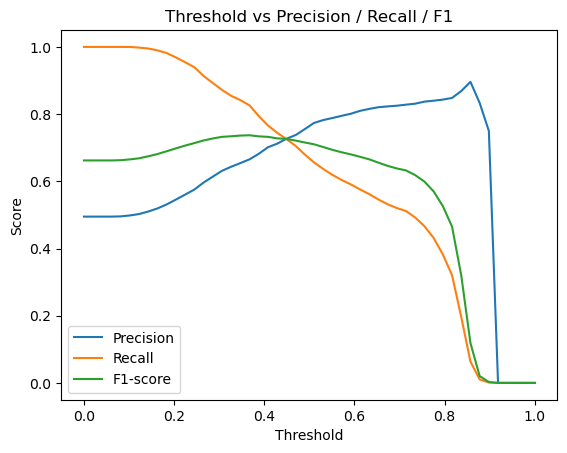

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

thresholds = np.linspace(0, 1, 50)
precisions, recalls, f1s = [], [], []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1-score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Precision / Recall / F1")
plt.legend()
plt.show()


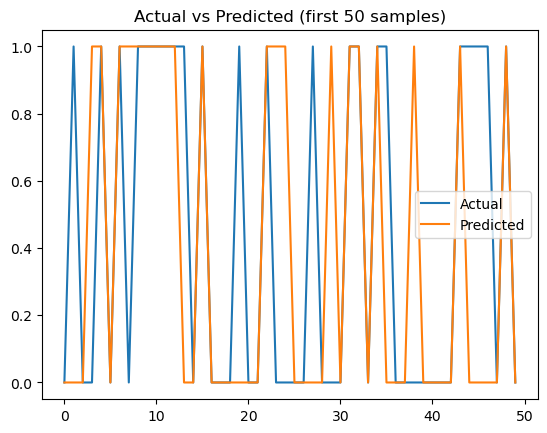

In [40]:
y_pred = (y_prob >= 0.5).astype(int)

plt.plot(y_test.values[:50], label="Actual")
plt.plot(y_pred[:50], label="Predicted")
plt.title("Actual vs Predicted (first 50 samples)")
plt.legend()
plt.show()
